In [2]:
# import all dependencies

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Clean Up Process

In [3]:
apple_store = pd.read_csv('Resources/AppleStore.csv')
google_store = pd.read_csv('Resources/googleplaystore.csv')


In [4]:
apple_store.head()

,Unnamed: 0,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,1,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1
1,2,281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1
2,3,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1
3,4,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,USD,0.00,262241,649,4.0,4.5,5.10.0,12+,Shopping,37,5,9,1
4,5,282935706,Bible,92774400,USD,0.00,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,1


In [5]:
google_store.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Command & Conquer: Rivals,FAMILY,NaN,0,Varies with device,0,NaN,0,Everyone 10+,Strategy,28-Jun-18,Varies with device,Varies with device
1,Popsicle Launcher for Android P 9.0 launcher,PERSONALIZATION,NaN,0,5.5M,0+,Paid,$1.49,Everyone,Personalization,11-Jul-18,1.1,4.2 and up
2,Ak Parti Yardım Toplama,SOCIAL,NaN,0,8.7M,0+,Paid,$13.99,Teen,Social,28-Jul-17,3.4.4.3.3,4.1 and up
3,AP Series Solution Pro,FAMILY,NaN,0,7.4M,0+,Paid,$1.99,Everyone,Education,30-Jul-17,1.3,4.0 and up
4,Ain Arabic Kids Alif Ba ta,FAMILY,NaN,0,33M,0+,Paid,$2.99,Everyone,Education,15-Apr-16,1,3.0 and up


In [6]:
apple_store.dtypes

Unnamed: 0            int64
id                    int64
track_name           object
size_bytes            int64
currency             object
price               float64
rating_count_tot      int64
rating_count_ver      int64
user_rating         float64
user_rating_ver     float64
ver                  object
cont_rating          object
prime_genre          object
sup_devices.num       int64
ipadSc_urls.num       int64
lang.num              int64
vpp_lic               int64
dtype: object

In [7]:
# Clean up the apple store table
app_store1 = apple_store.drop(['Unnamed: 0', 'id', 'currency', 'rating_count_ver', 'user_rating_ver',
                              'ver', 'sup_devices.num', 'ipadSc_urls.num', 'vpp_lic'], axis=1)
app_store1.head()


,track_name,size_bytes,price,rating_count_tot,user_rating,cont_rating,prime_genre,lang.num
0,PAC-MAN Premium,100788224,3.99,21292,4.0,4+,Games,10
1,Evernote - stay organized,158578688,0.00,161065,4.0,4+,Productivity,23
2,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,0.00,188583,3.5,4+,Weather,3
3,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,0.00,262241,4.0,12+,Shopping,9
4,Bible,92774400,0.00,985920,4.5,4+,Reference,45


In [8]:
app_store = app_store1.rename(columns={'track_name':'App', 'size_bytes': 'Size', 'price': 'Price', 'prime_genre': 'Genre', 'rating_count_tot': 'user_rating','user_rating': 'Ratings', 'lang.num': 'language'}, inplace=True)
app_store1.head()


,App,Size,Price,user_rating,Ratings,cont_rating,Genre,language
0,PAC-MAN Premium,100788224,3.99,21292,4.0,4+,Games,10
1,Evernote - stay organized,158578688,0.00,161065,4.0,4+,Productivity,23
2,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,0.00,188583,3.5,4+,Weather,3
3,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,0.00,262241,4.0,12+,Shopping,9
4,Bible,92774400,0.00,985920,4.5,4+,Reference,45


In [9]:
# clean up the Google Play store table
google_store.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [10]:
# clean up the Google Play store table
play_store = google_store.drop(['Category', 'Last Updated', 'Current Ver', 'Android Ver'], axis=1)
play_store.head()

,App,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
0,Command & Conquer: Rivals,NaN,0,Varies with device,0,NaN,0,Everyone 10+,Strategy
1,Popsicle Launcher for Android P 9.0 launcher,NaN,0,5.5M,0+,Paid,$1.49,Everyone,Personalization
2,Ak Parti Yardım Toplama,NaN,0,8.7M,0+,Paid,$13.99,Teen,Social
3,AP Series Solution Pro,NaN,0,7.4M,0+,Paid,$1.99,Everyone,Education
4,Ain Arabic Kids Alif Ba ta,NaN,0,33M,0+,Paid,$2.99,Everyone,Education


In [11]:
play_store.Price = play_store.Price.apply(lambda x: str(x).replace("Everyone","0"))

In [12]:
play_store.Price = play_store.Price.apply(lambda x: str(x).replace("$",""))
play_store['Price'] = pd.to_numeric(play_store['Price'])

# Application Categories

### Apple Store

In [13]:
# List of unique values
app_store1.Genre.unique()


array(['Games', 'Productivity', 'Weather', 'Shopping', 'Reference',
       'Finance', 'Music', 'Utilities', 'Travel', 'Social Networking',
       'Sports', 'Business', 'Health & Fitness', 'Entertainment',
       'Photo & Video', 'Navigation', 'Education', 'Lifestyle',
       'Food & Drink', 'News', 'Book', 'Medical', 'Catalogs'],
      dtype=object)

In [14]:
# count the number of unique values
app_category = app_store1.Genre.value_counts()
app_store_cat = app_category.nlargest(5)

In [15]:
percent = 100 * app_store_cat/app_store_cat.sum()
percent

Games            70.901414
Entertainment     9.821920
Education         8.316504
Photo & Video     6.407197
Utilities         4.552965
Name: Genre, dtype: float64

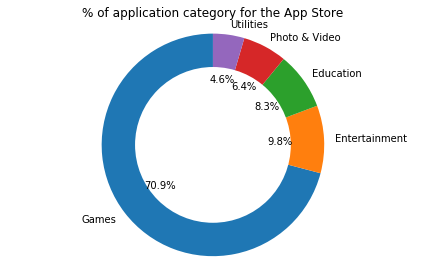

<Figure size 432x288 with 0 Axes>

In [16]:
# construct the pie chart for App Store

labels = ['Games', 'Entertainment', 'Education', 'Photo & Video','Utilities']
sizes = percent

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('% of application category for the App Store')
ax1.axis('equal')  
plt.tight_layout()
plt.show()

plt.savefig('app_category.jpg')


### Google Play Store

In [16]:
# Google Play Store Pie Chart
play_store.Genres.unique()

array(['Strategy', 'Personalization', 'Social', 'Education',
       'Productivity', 'Business', 'News & Magazines', 'Art & Design',
       'Travel & Local', 'Medical', 'Finance', 'Lifestyle',
       'Books & Reference', 'Communication', 'Entertainment', 'Arcade',
       'Photography', 'Tools', 'Video Players & Editors',
       'Auto & Vehicles', 'Beauty', 'Comics', 'Dating',
       'Education;Education', 'Education;Creativity',
       'Education;Action & Adventure', 'Education;Pretend Play',
       'Education;Brain Games', 'Entertainment;Brain Games',
       'Entertainment;Creativity', 'Entertainment;Music & Video',
       'Events', 'Food & Drink', 'Health & Fitness', 'House & Home',
       'Libraries & Demo', 'Action', 'Casual', 'Puzzle', 'Racing',
       'Sports', 'Simulation', 'Role Playing', 'Casual;Brain Games',
       'Educational;Education', 'Educational;Brain Games',
       'Entertainment;Education', 'Casual;Education',
       'Casual;Pretend Play', 'Educational;Pretend Play',


In [17]:
play_category = play_store.Genres.value_counts()
play_store_cat = play_category.nlargest(10)
play_store_cat

Tools              842
Entertainment      623
Education          549
Medical            463
Business           460
Productivity       424
Sports             398
Personalization    392
Communication      387
Lifestyle          381
Name: Genres, dtype: int64

In [18]:
percent2 = 100 * play_store_cat/play_store_cat.sum()
percent2

Tools              17.117300
Entertainment      12.665176
Education          11.160805
Medical             9.412482
Business            9.351494
Productivity        8.619638
Sports              8.091075
Personalization     7.969099
Communication       7.867453
Lifestyle           7.745477
Name: Genres, dtype: float64

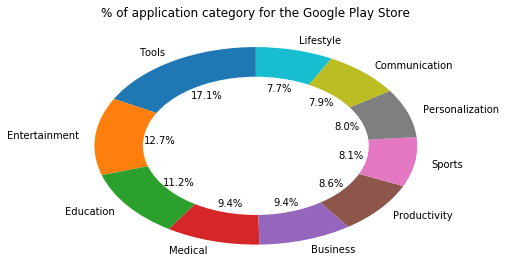

<Figure size 432x288 with 0 Axes>

In [19]:
labels = ['Tools', 'Entertainment', 'Education', 'Medical','Business', 'Productivity', 
          'Sports', 'Personalization', 'Communication', 'Lifestyle']
sizes = percent2

fig2, ax2 = plt.subplots()
ax2.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('% of application category for the Google Play Store')
ax1.axis('equal')  
plt.tight_layout()
plt.show()

plt.savefig('play_category.jpg')

# Application Price Range

### Apple Store

In [20]:
app_free = sum(app_store1.Price == 0)
max_price_app = max(app_store1.Price)
print('The total of free apps for apple store:', app_free)
print('The maximum price of applications in the apple store:', max_price_app)

The total of free apps for apple store: 4056
The maximum price of applications in the apple store: 299.99


In [21]:

app_price_list = app_store1['Price'].value_counts(dropna=False)
app_price_list

0.00      4056
0.99       728
2.99       683
1.99       621
4.99       394
3.99       277
6.99       166
9.99        81
5.99        52
7.99        33
14.99       21
19.99       13
8.99         9
24.99        8
13.99        6
11.99        6
29.99        6
12.99        5
15.99        4
59.99        3
17.99        3
22.99        2
23.99        2
20.99        2
27.99        2
16.99        2
49.99        2
39.99        2
74.99        1
18.99        1
34.99        1
99.99        1
299.99       1
47.99        1
21.99        1
249.99       1
Name: Price, dtype: int64

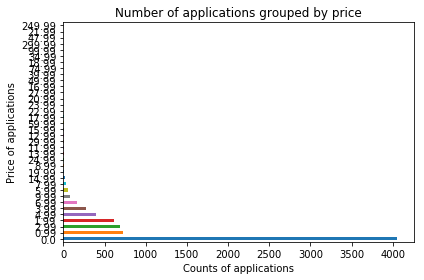

<Figure size 432x288 with 0 Axes>

In [22]:
# Bar graph is representing the applications that is available in the apple store.

app_store1['Price'].value_counts().plot(kind='barh')
plt.title('Number of applications grouped by price')
plt.xlabel('Counts of applications')
plt.ylabel('Price of applications')
ax1.axis('equal')  
plt.tight_layout()
plt.show()

plt.savefig('app_price.jpg')

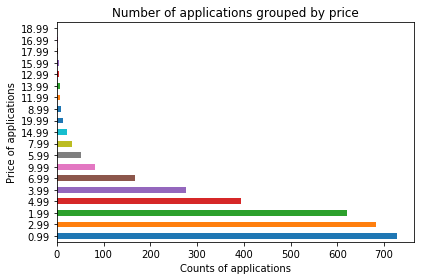

<Figure size 432x288 with 0 Axes>

In [23]:
# Bar graph of the applications in the apple store without free applications
paid_app_store = app_store1[((app_store1.Price > 0) & (app_store1.Price < 20))]

paid_app_store['Price'].value_counts().plot(kind='barh')
plt.title('Number of applications grouped by price')
plt.xlabel('Counts of applications')
plt.ylabel('Price of applications')
ax1.axis('equal')  
plt.tight_layout()
plt.show()

plt.savefig('app_price_no0.jpg')

### Google Play Store

In [24]:
play_free = sum(play_store.Price == 0)
max_price_play = max(play_store.Price)
print('The total of free apps for apple store:', play_free)
print('The maximum price of applications in the apple store:', max_price_play)

The total of free apps for apple store: 10041
The maximum price of applications in the apple store: 400.0


In [25]:
play_price_list = play_store['Price'].value_counts(dropna=False)
play_price_list

0.00      10041
0.99        148
2.99        129
1.99         73
4.99         72
3.99         63
1.49         46
5.99         30
2.49         26
9.99         21
6.99         13
399.99       12
14.99        11
4.49          9
7.99          7
29.99         7
3.49          7
24.99         7
5.49          6
19.99         6
6.49          5
8.99          5
12.99         5
11.99         5
2.00          3
16.99         3
1.00          3
10.00         3
33.99         2
9.00          2
          ...  
3.08          1
4.80          1
18.99         1
1.96          1
109.99        1
15.46         1
3.28          1
299.99        1
2.56          1
3.90          1
19.40         1
74.99         1
4.59          1
19.90         1
2.90          1
89.99         1
400.00        1
30.99         1
4.85          1
1.20          1
37.99         1
25.99         1
15.99         1
379.99        1
154.99        1
1.59          1
46.99         1
1.61          1
28.99         1
1.04          1
Name: Price, Length: 92,

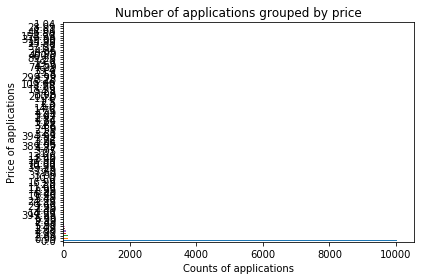

<Figure size 432x288 with 0 Axes>

In [26]:
# plot bar graph for google play applications

play_store['Price'].value_counts().plot(kind='barh')
plt.title('Number of applications grouped by price')
plt.xlabel('Counts of applications')
plt.ylabel('Price of applications')
ax1.axis('equal')  
plt.tight_layout()
plt.show()

plt.savefig('play_price.jpg')

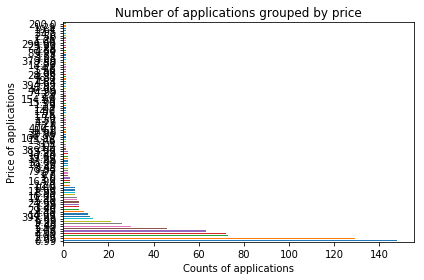

<Figure size 432x288 with 0 Axes>

In [27]:
# Bar graph of the applications in the apple store without free applications
paid_play_store = play_store[(play_store.Price > 0)]

paid_play_store['Price'].value_counts().plot(kind='barh')
plt.title('Number of applications grouped by price')
plt.xlabel('Counts of applications')
plt.ylabel('Price of applications')
ax1.axis('equal')  
plt.tight_layout()
plt.show()

plt.savefig('play_price_no0.jpg')

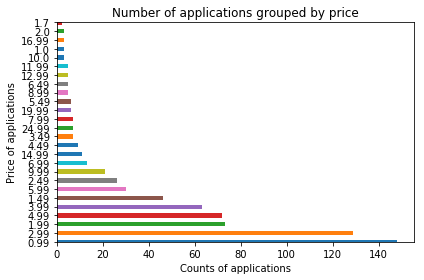

<Figure size 432x288 with 0 Axes>

In [28]:
paid_play_store = play_store[((play_store.Price > 0) & (play_store.Price < 25))]

paid_play_store['Price'].value_counts().plot(kind='barh')
plt.title('Number of applications grouped by price')
plt.xlabel('Counts of applications')
plt.ylabel('Price of applications')
plt.ylim(0.0, 25)
ax1.axis('equal')  
plt.tight_layout()
plt.show()

plt.savefig('play_price_0_25.jpg')

# User Rating Counts

### Apple Store

In [29]:
app_store1.Ratings.value_counts()


4.5    2663
4.0    1626
0.0     929
3.5     702
5.0     492
3.0     383
2.5     196
2.0     106
1.5      56
1.0      44
Name: Ratings, dtype: int64

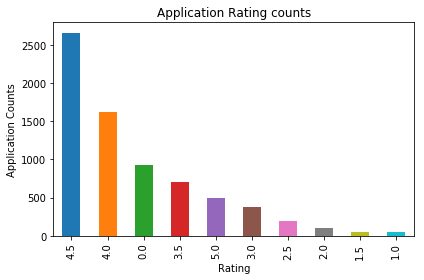

<Figure size 432x288 with 0 Axes>

In [30]:
app_store1['Ratings'].value_counts().plot(kind='bar')
plt.title('Application Rating counts')
plt.xlabel('Rating')
plt.ylabel('Application Counts')

ax1.axis('equal')  
plt.tight_layout()
plt.show()

plt.savefig('app_rating.jpg')


### Play Store

In [31]:
play_store.Rating.value_counts()

4.4     1109
4.3     1076
4.5     1038
4.2      952
4.6      823
4.1      708
4.0      568
4.7      499
3.9      386
3.8      303
5.0      274
3.7      239
4.8      234
3.6      174
3.5      163
3.4      128
3.3      102
4.9       87
3.0       83
3.1       69
3.2       64
2.9       45
2.8       42
2.6       25
2.7       25
2.5       21
2.3       20
2.4       19
1.0       16
2.2       14
1.9       13
2.0       12
2.1        8
1.8        8
1.7        8
1.6        4
1.5        3
1.4        3
1.2        1
19.0       1
Name: Rating, dtype: int64

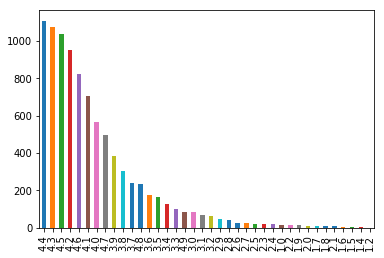

In [32]:
play_rating = play_store[(play_store.Rating < 5)]
play_rating['Rating'].value_counts().plot(kind='bar')

# Load the datasets onto database

In [33]:
from sqlalchemy import create_engine
from sqlalchemy.ext.declarative import declarative_base
Base = declarative_base()
from sqlalchemy import Column, Integer, String, Float

In [34]:
# Convert Apple store data into csv 
app_store1.to_csv('app_store.csv')

In [35]:
# Convert Play store data into csv
play_store.to_csv('play_store.csv')

In [36]:
# load csv onto msql workbench database
connection_string = 'root:password@localhost:3306/app_db'
engine = create_engine(f'mysql+pymysql://{connection_string}')


In [37]:
#app_store1.to_sql(con=engine, name='app_store', if_exists = 'append')

In [38]:
#play_store.to_sql(con=engine, name='play_store', if_exists = 'append')


In [39]:
# confirm tables within DB
engine.table_names()

/anaconda3/lib/python3.6/site-packages/pymysql/cursors.py:170: Warning: (3719, "'utf8' is currently an alias for the character set UTF8MB3, but will be an alias for UTF8MB4 in a future release. Please consider using UTF8MB4 in order to be unambiguous.")
  result = self._query(query)


['app_store', 'play_store']

In [40]:
app_store1.head()

,App,Size,Price,user_rating,Ratings,cont_rating,Genre,language
0,PAC-MAN Premium,100788224,3.99,21292,4.0,4+,Games,10
1,Evernote - stay organized,158578688,0.00,161065,4.0,4+,Productivity,23
2,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,0.00,188583,3.5,4+,Weather,3
3,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,0.00,262241,4.0,12+,Shopping,9
4,Bible,92774400,0.00,985920,4.5,4+,Reference,45


In [41]:
play_store.head()

,App,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
0,Command & Conquer: Rivals,NaN,0,Varies with device,0,NaN,0.00,Everyone 10+,Strategy
1,Popsicle Launcher for Android P 9.0 launcher,NaN,0,5.5M,0+,Paid,1.49,Everyone,Personalization
2,Ak Parti Yardım Toplama,NaN,0,8.7M,0+,Paid,13.99,Teen,Social
3,AP Series Solution Pro,NaN,0,7.4M,0+,Paid,1.99,Everyone,Education
4,Ain Arabic Kids Alif Ba ta,NaN,0,33M,0+,Paid,2.99,Everyone,Education


# Application Size (bit) and Price 

### Apple Store

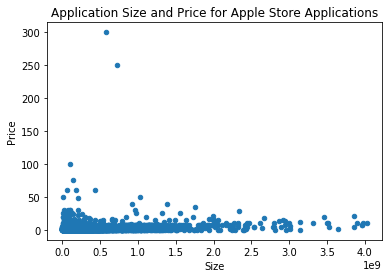

In [42]:
ax1 = app_store1.plot.scatter(x='Size', y='Price')
plt.title('Application Size and Price for Apple Store Applications')
plt.savefig('Images/app_size_price.jpg')

### Google Play Store

For Google Play Store, the size for the applications are depending on the size of the devices. Therefore, we cannot determine the relationship between the application size and the price. 

# Language Support and User Rating

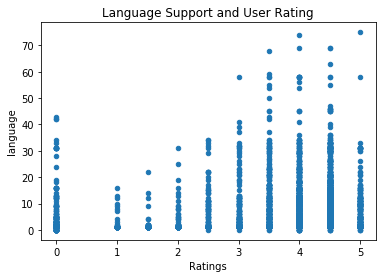

In [44]:
lang = app_store1.plot.scatter(x='Ratings', y='language')
plt.title('Language Support and User Rating')
plt.savefig('Images/language_user.jpg')

# Comparing Genre and Price of Applications
### Apple Store

In [45]:
# Group the applications into free and paid
free_app = app_store1[app_store1.Price == 0].Genre.value_counts().sort_index().to_frame()
paid_app = app_store1[app_store1.Price > 0].Genre.value_counts().sort_index().to_frame()
total_app = app_store1.Genre.value_counts().sort_index().to_frame()

In [46]:
# Create the dataframe for free and paid applications
free_app.columns=['Free']
paid_app.columns=['Paid']
total_app.columns=['Total']
enter = free_app.join(paid_app).join(total_app)
enter['paid_percent'] = enter.Paid*100/enter.Total
enter['free_percent'] = enter.Free*100/enter.Total
enter

,Free,Paid,Total,paid_percent,free_percent
Book,66,46,112,41.071429,58.928571
Business,20,37,57,64.912281,35.087719
Catalogs,9,1,10,10.000000,90.000000
Education,132,321,453,70.860927,29.139073
Entertainment,334,201,535,37.570093,62.429907
Finance,84,20,104,19.230769,80.769231
Food & Drink,43,20,63,31.746032,68.253968
Games,2257,1605,3862,41.558778,58.441222
Health & Fitness,76,104,180,57.777778,42.222222
Lifestyle,94,50,144,34.722222,65.277778


In [47]:
free_list = enter.free_percent.tolist()
free_tuple = tuple(free_list)
paid_tuple = tuple(enter.paid_percent.tolist())


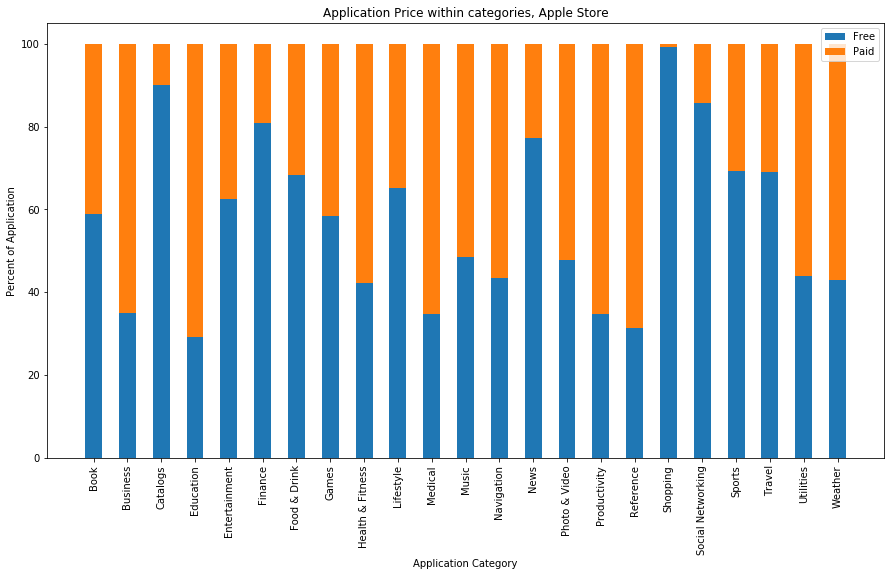

In [75]:
# bar graph indicating free apps and paid apps in the Apple Store
plt.figure(figsize=(15,8))
N = 23
loc = np.arange(N)
width = 0.5

ax1 = plt.bar(loc, free_tuple, width)
ax2 = plt.bar(loc, paid_tuple, width,bottom=free_tuple)

plt.xticks(loc, tuple(enter.index.tolist()), rotation='vertical')
plt.legend((ax1[0], ax2[0]), ('Free', 'Paid'))
plt.title('Application Price within categories, Apple Store')
plt.xlabel('Application Category')
plt.ylabel('Percent of Application')
plt.show()

### Google Play Store

In [58]:
# Group the applications into free and paid
free_play = play_store[play_store.Price == 0].Genres.value_counts().sort_index().to_frame()
paid_play = play_store[play_store.Price > 0].Genres.value_counts().sort_index().to_frame()
total_play = play_store.Genres.value_counts().sort_index().to_frame()


In [59]:
# Create the dataframe for free and paid applications
free_play.columns=['Free']
paid_play.columns=['Paid']
total_play.columns=['Total']
enter2 = free_play.join(paid_play).join(total_play)
enter2['paid_percent'] = enter2.Paid*100/enter2.Total
enter2['free_percent'] = enter2.Free*100/enter2.Total
enter2

,Free,Paid,Total,paid_percent,free_percent
11-Feb-18,1,NaN,1,NaN,100.000000
Action,341,24.0,365,6.575342,93.424658
Action;Action & Adventure,14,3.0,17,17.647059,82.352941
Adventure,63,12.0,75,16.000000,84.000000
Adventure;Action & Adventure,11,2.0,13,15.384615,84.615385
Adventure;Education,2,NaN,2,NaN,100.000000
Arcade,200,20.0,220,9.090909,90.909091
Arcade;Action & Adventure,12,4.0,16,25.000000,75.000000
Arcade;Pretend Play,1,NaN,1,NaN,100.000000
Art & Design,55,3.0,58,5.172414,94.827586


In [71]:
free_list2 = enter3.free_percent.tolist()
free_tuple2 = tuple(free_list2)
paid_tuple2 = tuple(enter3.paid_percent.tolist())


In [72]:
enter3 = enter2[enter2['Total'] > 99]  
enter3

,Free,Paid,Total,paid_percent,free_percent
Action,341,24.0,365,6.575342,93.424658
Arcade,200,20.0,220,9.090909,90.909091
Books & Reference,203,28.0,231,12.121212,87.878788
Business,446,14.0,460,3.043478,96.956522
Casual,184,9.0,193,4.663212,95.336788
Communication,360,27.0,387,6.976744,93.023256
Dating,227,7.0,234,2.991453,97.008547
Education,519,30.0,549,5.464481,94.535519
Entertainment,604,19.0,623,3.049759,96.950241
Finance,349,17.0,366,4.644809,95.355191


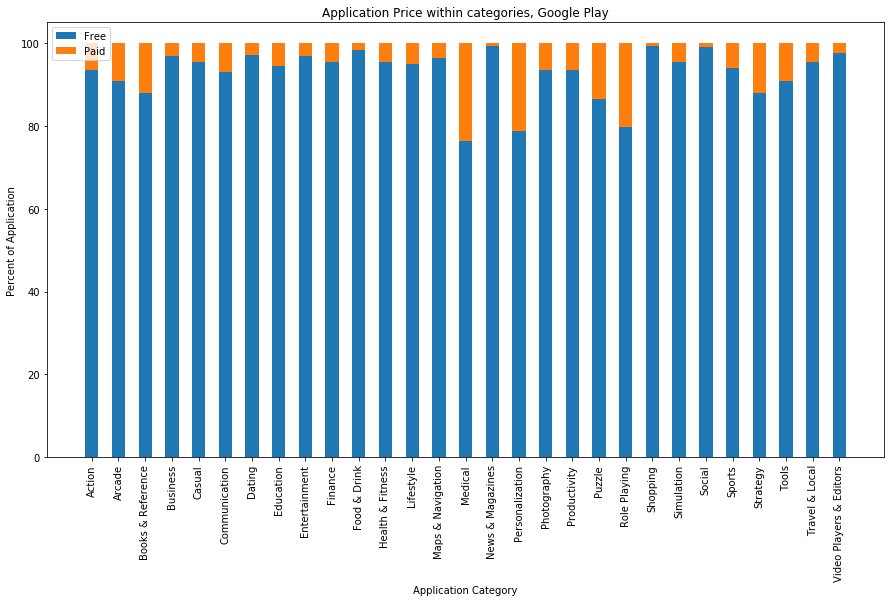

In [74]:
# bar graph indicating free apps and paid apps in the Google Play Store
plt.figure(figsize=(15,8))
N = 29
loc2 = np.arange(N)
width = 0.5

ax3 = plt.bar(loc2, free_tuple2, width)
ax4 = plt.bar(loc2, paid_tuple2, width,bottom=free_tuple2)

plt.xticks(loc2, tuple(enter3.index.tolist()), rotation='vertical')
plt.legend((ax3[0], ax4[0]), ('Free', 'Paid'))
plt.title('Application Price within categories, Google Play')
plt.xlabel('Application Category')
plt.ylabel('Percent of Application')
plt.show()

# Machine Learning

Looking at the Apple Store dataset to determined the relationship between the number of language supported and user ratings. 

In [78]:
# check the dataset
app_store1.head()

,App,Size,Price,user_rating,Ratings,cont_rating,Genre,language
0,PAC-MAN Premium,100788224,3.99,21292,4.0,4+,Games,10
1,Evernote - stay organized,158578688,0.00,161065,4.0,4+,Productivity,23
2,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,0.00,188583,3.5,4+,Weather,3
3,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,0.00,262241,4.0,12+,Shopping,9
4,Bible,92774400,0.00,985920,4.5,4+,Reference,45


In [79]:
X = app_store1['Ratings'].values.reshape(-1,1)
y = app_store1['language'].values.reshape(-1,1)

print('Shape ', X.shape, y.shape)

Shape  (7197, 1) (7197, 1)


Text(0,0.5,'Number of Language Supported')

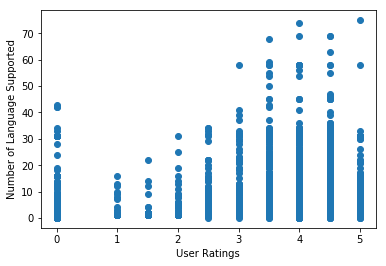

In [80]:
# Plot the data to see the linear trend
plt.scatter(X,y)
plt.xlabel('User Ratings')
plt.ylabel('Number of Language Supported')

In [81]:
# Split data into train and test data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42)

In [83]:
# Create a model

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [85]:
# Calculate the mean_squared_error and the r-squared value

from sklearn.metrics import mean_squared_error, r2_score

predicted = model.predict(X_test)
mse = mean_squared_error(y_test, predicted)
r2 = r2_score(y_test, predicted)

print('Mean Squared Error: ', mse)
print('R2: ', r2)

Mean Squared Error:  53.57410829981956
R2:  0.021428928818751136


In [86]:
model.score(X_test, y_test)

0.021428928818751133

There are no relationship between the application rating and the number that the application supported. 